In [1]:
#conda install pytorch torchvision torchaudio cpuonly -c pytorch

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Комментарий ревьюера</b>


Привет, Анастасия! Давай знакомиться! Меня зовут Дмитрий Махортов, и я буду проверять твой проект. Сразу предлагаю общение на «ты» 🙂, но если тебе это не комфортно, то дай знать, и мы перейдем на «вы». 


Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе погрузиться в увлекательный мир работы с данными и вырасти в крепкого профи. Это отдаленная цель. А ближайшая - сделать твою работу еще лучше )).
   
    
Все ключевые этапы в работе выполнены, и я вижу что с проектом ты справшяешься. Есть моменты, которые нужно доработать, но я уверен, у тебя все получится.
        
Расскажу как обычно проходит проверка:    
Бывают моменты, которые требуют пристального внимания. Комментарии по ним выделены <span style='background-color:#F7B3A4'> красным цветом </span> и обозначены значком 🛑. После их доработки проект будет принят.  🙂
 
<span style='background-color:#B7EBA7'> Зеленым цветом </span> и значком ✅ отмечены удачные и элегантные решения, на которые можно опираться в будущих проектах. Или советы «со звездочкой», которые помогут тебе в будущем.

<span style='background-color:#F9EDA6'>Жёлтым цветом </span> и значком ⚠️ выделено то, что в следующий раз можно сделать по-другому. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас (однако это не обязательно).

Давай работать над проектом в диалоге: **если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом**. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения. Пожалуйста, **не перемещай, не изменяй и не удаляй мои комментарии**. Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>образец комментария студента</b></font>
   
Можешь использовать этот комментарий. Просто удали этот текст и вместо него напиши свой 🙂

</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>
   
Привет! Спасибо за ревью, это был не простой проект. Я постаралась учесть все замечания. Оставила комментарии по ходу кода.

</div>

In [2]:
import os
import ntpath
import random
import re
from os.path import exists, isfile, join
from pathlib import Path
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
from PIL import Image, UnidentifiedImageError

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
import torch.optim as optim

from tqdm import tqdm
from tqdm.notebook import tqdm
import joblib
import transformers

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GroupShuffleSplit
from sklearn.feature_extraction.text import TfidfVectorizer

tqdm.pandas()
warnings.filterwarnings('ignore')

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Отлично, все нужные библиотеки импортированы в начале ноутбука.Это хорошая практика.</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Но стоит внести их внутрь проекта
</div>

# Поиск по изображениям

Нам поручено разработать демонстрационную версию поиска изображений по запросу.  
Для демонстрационной версии нужно обучить модель, которая получит векторное представление изображения, векторное представление текста, а на выходе выдаст число от 0 до 1 — покажет, насколько текст и картинка подходят друг другу.

**Описание данных**
В файле `train_dataset.csv` собрана информация, необходимая для обучения: имя файла изображения, идентификатор описания и текст описания. Для одной картинки может быть доступно до 5 описаний. Идентификатор описания имеет формат <имя файла изображения>#<порядковый номер описания>.  
В папке `train_images` содержатся изображения для тренировки модели.  
В файле `CrowdAnnotations.tsv` — данные по соответствию изображения и описания, полученные с помощью краудсорсинга. Номера колонок и соответствующий тип данных:
1. Имя файла изображения.  
1. Идентификатор описания.  
1. Доля людей, подтвердивших, что описание соответствует изображению.  
1. Количество человек, подтвердивших, что описание соответствует изображению.  
1. Количество человек, подтвердивших, что описание не соответствует изображению.  

В файле `ExpertAnnotations.tsv` содержатся данные по соответствию изображения и описания, полученные в результате опроса экспертов. Номера колонок и соответствующий тип данных:  
1. Имя файла изображения.  
1. Идентификатор описания.  

3, 4, 5 — оценки трёх экспертов.
Эксперты ставят оценки по шкале от 1 до 4, где 1 — изображение и запрос совершенно не соответствуют друг другу, 2 — запрос содержит элементы описания изображения, но в целом запрос тексту не соответствует, 3 — запрос и текст соответствуют с точностью до некоторых деталей, 4 — запрос и текст соответствуют полностью.  
В файле `test_queries.csv` находится информация, необходимая для тестирования: идентификатор запроса, текст запроса и релевантное изображение. Для одной картинки может быть доступно до 5 описаний. Идентификатор описания имеет формат <имя файла изображения>#<порядковый номер описания>.  
В папке `test_images` содержатся изображения для тестирования модели.

## Подготовка

Загрузим данные.

In [3]:
data_path = 'Sbornuy_4'

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Большое тебе человеческое спасибо за вынос пути к данным в отдельную константу. Это сэкономило мне немало времени при проверке.</div>

In [4]:
# Путь к изображениям для тренировки и тестирования
train_path = os.path.join(data_path, 'train_images')
test_path = os.path.join(data_path, 'test_images2')

# Чтение CSV файлов
df_train = pd.read_csv(os.path.join(data_path, 'train_dataset.csv'))
df_test =  pd.read_csv(os.path.join(data_path, 'test_queries.csv'), sep='|',index_col = 0)

# Чтение TSV файлов с краудсорсинговыми и экспертными оценками
df_crowd = pd.read_csv(os.path.join(data_path, 'CrowdAnnotations.tsv'), sep='\t',
                      names = ['image_id', 'query_id', 'crowd_score', 'agree_count', 'disagree_count'])
df_expert = pd.read_csv(os.path.join(data_path, 'ExpertAnnotations.tsv'), sep='\t',
                        names = ['image', 'query_id', 'first_exp', 'second_exp', 'third_exp'])


Посмотрим на общую информацию и на первые 5 строк датасетов.

In [5]:
display (df_train.head())
df_train.info()

image                     query_id  \
0  1056338697_4f7d7ce270.jpg  2549968784_39bfbe44f9.jpg#2   
1  1262583859_653f1469a9.jpg  2549968784_39bfbe44f9.jpg#2   
2  2447284966_d6bbdb4b6e.jpg  2549968784_39bfbe44f9.jpg#2   
3  2549968784_39bfbe44f9.jpg  2549968784_39bfbe44f9.jpg#2   
4  2621415349_ef1a7e73be.jpg  2549968784_39bfbe44f9.jpg#2   

                                          query_text  
0  A young child is wearing blue goggles and sitt...  
1  A young child is wearing blue goggles and sitt...  
2  A young child is wearing blue goggles and sitt...  
3  A young child is wearing blue goggles and sitt...  
4  A young child is wearing blue goggles and sitt...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image       5822 non-null   object
 1   query_id    5822 non-null   object
 2   query_text  5822 non-null   object
dtypes: object(3)
memory usage: 136.6+ KB


In [6]:
display (df_test.head())
df_test.info()

query_id  \
0  1177994172_10d143cb8d.jpg#0   
1  1177994172_10d143cb8d.jpg#1   
2  1177994172_10d143cb8d.jpg#2   
3  1177994172_10d143cb8d.jpg#3   
4  1177994172_10d143cb8d.jpg#4   

                                          query_text  \
0  Two blonde boys , one in a camouflage shirt an...   
1  Two boys are squirting water guns at each other .   
2            Two boys spraying each other with water   
3  Two children wearing jeans squirt water at eac...   
4  Two young boys are squirting water at each oth...   

                       image  
0  1177994172_10d143cb8d.jpg  
1  1177994172_10d143cb8d.jpg  
2  1177994172_10d143cb8d.jpg  
3  1177994172_10d143cb8d.jpg  
4  1177994172_10d143cb8d.jpg

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   query_id    500 non-null    object
 1   query_text  500 non-null    object
 2   image       500 non-null    object
dtypes: object(3)
memory usage: 15.6+ KB


In [7]:
display (df_crowd.head())
df_crowd.info()

image_id                     query_id  crowd_score  \
0  1056338697_4f7d7ce270.jpg  1056338697_4f7d7ce270.jpg#2          1.0   
1  1056338697_4f7d7ce270.jpg   114051287_dd85625a04.jpg#2          0.0   
2  1056338697_4f7d7ce270.jpg  1427391496_ea512cbe7f.jpg#2          0.0   
3  1056338697_4f7d7ce270.jpg  2073964624_52da3a0fc4.jpg#2          0.0   
4  1056338697_4f7d7ce270.jpg  2083434441_a93bc6306b.jpg#2          0.0   

   agree_count  disagree_count  
0            3               0  
1            0               3  
2            0               3  
3            0               3  
4            0               3

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47830 entries, 0 to 47829
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   image_id        47830 non-null  object 
 1   query_id        47830 non-null  object 
 2   crowd_score     47830 non-null  float64
 3   agree_count     47830 non-null  int64  
 4   disagree_count  47830 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.8+ MB


In [8]:
display (df_expert.head())
df_expert.info()

image                     query_id  first_exp  \
0  1056338697_4f7d7ce270.jpg  2549968784_39bfbe44f9.jpg#2          1   
1  1056338697_4f7d7ce270.jpg  2718495608_d8533e3ac5.jpg#2          1   
2  1056338697_4f7d7ce270.jpg  3181701312_70a379ab6e.jpg#2          1   
3  1056338697_4f7d7ce270.jpg  3207358897_bfa61fa3c6.jpg#2          1   
4  1056338697_4f7d7ce270.jpg  3286822339_5535af6b93.jpg#2          1   

   second_exp  third_exp  
0           1          1  
1           1          2  
2           1          2  
3           2          2  
4           1          2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image       5822 non-null   object
 1   query_id    5822 non-null   object
 2   first_exp   5822 non-null   int64 
 3   second_exp  5822 non-null   int64 
 4   third_exp   5822 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 227.6+ KB


- Все датасеты полностью заполнены, отсутствуют пропуски в данных.  
- Разные колонки имеют корректные типы данных, что упрощает обработку и анализ.  
- Основной тренировочный датасет (df_train) и экспертный датасет (df_expert) имеют одинаковое количество записей (5822).

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

Посмотрим на 16 случайных изображений для тренировки модели.

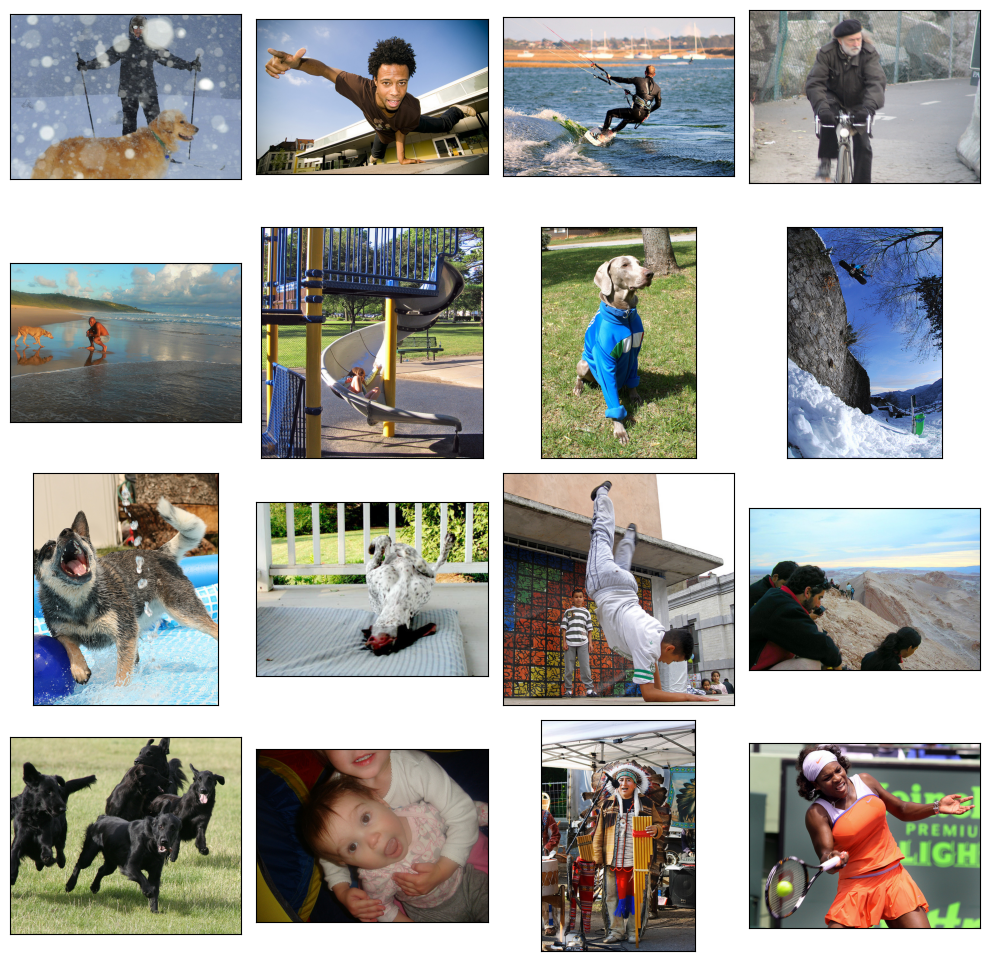

Всего изображений: 1000


In [9]:
imgs_train = []
imgs_train_filename = []
for f in os.listdir(train_path):
    imgs_train_filename.append(ntpath.basename(f))
    imgs_train.append(Image.open(os.path.join(train_path,f)).convert('RGB'))

random_imgs = random.sample(imgs_train, 16)

fig = plt.figure(figsize=(10, 10))
for i, img in enumerate(random_imgs):
    fig.add_subplot(4, 4, i + 1)
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()
plt.show()

print('Всего изображений:', len(imgs_train))

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

Посмотрим на 16 случайных изображений для тестирования модели.

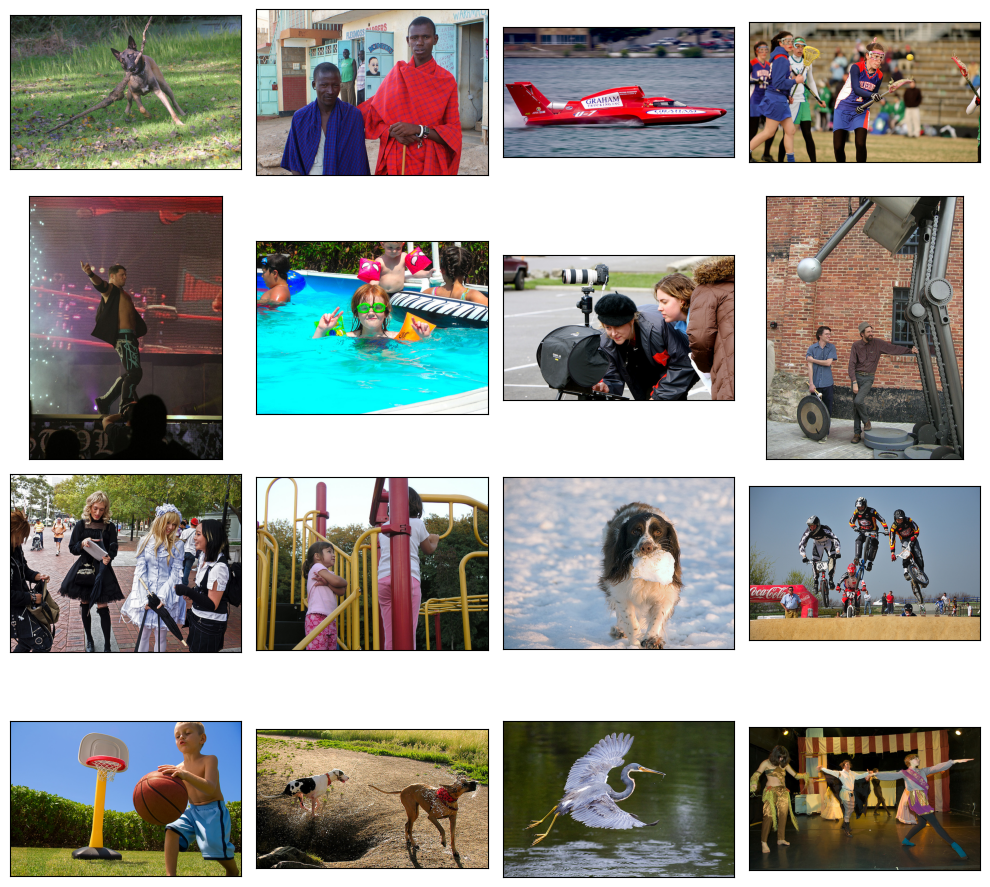

Всего изображений: 100


In [10]:
imgs_test = []
imgs_test_filename = []
for f in os.listdir(test_path):
    imgs_test_filename.append(ntpath.basename(f))
    imgs_test.append(Image.open(os.path.join(test_path,f)).convert('RGB'))

random_imgs = random.sample(imgs_test, 16)

fig = plt.figure(figsize=(10, 10))
for i, img in enumerate(random_imgs):
    fig.add_subplot(4, 4, i + 1)
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()
plt.show()

print('Всего изображений:', len(imgs_test))

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

В обоих датасетах представлены различные изображения с фотографиями детей, взрослых людей, собак, техники и природы.

### 1. Исследовательский анализ данных

Наш датасет содержит экспертные и краудсорсинговые оценки соответствия текста и изображения.  
В файле с экспертными мнениями для каждой пары изображение-текст имеются оценки от трёх специалистов. Агрегируем эти оценки по принципу голосования большинства. За какую оценку проголосовала большая часть экспертов (в нашем случае 2 или 3), та оценка и ставится как итоговая. Поскольку число экспертов меньше числа классов, может случиться, что каждый эксперт поставит разные оценки, например: 1, 4, 2. В таком случае данную пару изображение-текст можно исключить из датасета. На текущем шаге оставим такие оценки не заполненными и удалим их позже.

In [11]:
# Агрегация экспертных оценок
def aggregate_expert_scores(row):
    scores = row[2:].values  # Оценки экспертов
    unique_scores, counts = np.unique(scores, return_counts=True)
    if len(unique_scores) == len(scores):
        return None  # Если у каждого эксперта разные оценки, вернем None
    majority_vote = unique_scores[np.argmax(counts)]
    return majority_vote

# Добавим новую колонку с агрегированными оценками
df_expert['aggregated_score'] = df_expert.apply(aggregate_expert_scores, axis=1)

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

Экспертное мнение позволяет минимизировать ошибки и субъективные суждения, а так же в задачах, где общественные мнения или данные из краудсорсинга могут сильно варьироваться, экспертные оценки предоставляют более надежную основу.  
Таким образов в своей работе мы будем использовать только агрегированную экспертную оценку.  
Наша модель должна возвращать на выходе вероятность соответствия изображения тексту, поэтому целевая переменная должна иметь значения от 0 до 1, поэтому используем MinMaxScaler для нормализации наших данных.

In [12]:
scaler = MinMaxScaler()
df_expert['aggregated_score'] = scaler.fit_transform(df_expert[['aggregated_score']].values.reshape(-1, 1))

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
С использованием скаллера есть легкое противоречие.
    
Мы весь курс учим, что скаллеры, энкодеры, веткорайзеры обучаются на обучающей части данных. А сейчас ты обучаешь скаллер на всей выборке.
    
Это был бы однозначно красный комментарий если бы не одно НО - мы заранее знаем минимальную и максимальные оценки.
    
Но чтобы избежать любых вопросов я бы посоветовал использовать линейное преобразование (x-1) / 3
</div>

In [13]:
#Объединим данные
df_train = pd.merge(df_train, df_expert[['image', 'query_id', 'aggregated_score']],
                            how='inner', on=['image', 'query_id'])

In [14]:
display (df_train.head())
df_train.shape

image                     query_id  \
0  1056338697_4f7d7ce270.jpg  2549968784_39bfbe44f9.jpg#2   
1  1262583859_653f1469a9.jpg  2549968784_39bfbe44f9.jpg#2   
2  2447284966_d6bbdb4b6e.jpg  2549968784_39bfbe44f9.jpg#2   
3  2549968784_39bfbe44f9.jpg  2549968784_39bfbe44f9.jpg#2   
4  2621415349_ef1a7e73be.jpg  2549968784_39bfbe44f9.jpg#2   

                                          query_text  aggregated_score  
0  A young child is wearing blue goggles and sitt...          0.000000  
1  A young child is wearing blue goggles and sitt...          0.000000  
2  A young child is wearing blue goggles and sitt...          0.333333  
3  A young child is wearing blue goggles and sitt...          1.000000  
4  A young child is wearing blue goggles and sitt...          0.000000

(5822, 4)

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

Теперь удалим строки с пропущенными значениями в 'aggregated_score'.

In [15]:
df_train = df_train.dropna(subset=['aggregated_score'])
display(df_train.head())
df_train.shape

image                     query_id  \
0  1056338697_4f7d7ce270.jpg  2549968784_39bfbe44f9.jpg#2   
1  1262583859_653f1469a9.jpg  2549968784_39bfbe44f9.jpg#2   
2  2447284966_d6bbdb4b6e.jpg  2549968784_39bfbe44f9.jpg#2   
3  2549968784_39bfbe44f9.jpg  2549968784_39bfbe44f9.jpg#2   
4  2621415349_ef1a7e73be.jpg  2549968784_39bfbe44f9.jpg#2   

                                          query_text  aggregated_score  
0  A young child is wearing blue goggles and sitt...          0.000000  
1  A young child is wearing blue goggles and sitt...          0.000000  
2  A young child is wearing blue goggles and sitt...          0.333333  
3  A young child is wearing blue goggles and sitt...          1.000000  
4  A young child is wearing blue goggles and sitt...          0.000000

(5696, 4)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Решение использовать только экспертные оценки и не использовать краудсорс поддерживаю двумя руками.

Но я не смог найти в проекте обоснование или хотя бы объяснение этого решения. Пожалуйста или подскажи куда смотреть или объясни свое решение.
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font> 
    
Объяснение было выше, до скаллера, сразу после твоего комментария.  
   
`Экспертное мнение позволяет минимизировать ошибки и субъективные суждения, а так же в задачах, где общественные мнения или данные из краудсорсинга могут сильно варьироваться, экспертные оценки предоставляют более надежную основу.
Таким образов в своей работе мы будем использовать только агрегированную экспертную оценку.
Наша модель должна возвращать на выходе вероятность соответствия изображения тексту, поэтому целевая переменная должна иметь значения от 0 до 1, поэтому используем MinMaxScaler для нормализации наших данных.`

</div>

Мы написали функцию для агрегации экспертных оценок по принципу голосования большинства. Объединили данные тренировочного датасета с агрегированными экспертными оценками.

### 2. Проверка данных

В некоторых странах, где работает наша компания, действуют ограничения по обработке изображений: поисковым сервисам и сервисам, предоставляющим возможность поиска, запрещено без разрешения родителей или законных представителей предоставлять любую информацию, в том числе, но не исключительно тексты, изображения, видео и аудио, содержащие описание, изображение или запись голоса детей. Ребёнком считается любой человек, не достигший 16 лет.  
В нашем сервисе строго следуют законам стран, в которых работают. Поэтому при попытке посмотреть изображения, запрещённые законодательством, вместо картинок показывается дисклеймер: "This image is unavailable in your country in compliance with local laws".  
Однако у вас в PoC нет возможности воспользоваться данным функционалом. Поэтому все изображения, которые нарушают данный закон, нужно удалить из обучающей выборки.

Составим список ключевых слов, связанных с детьми.

In [16]:
child_keywords = ["child", "children", "kid", "infant", "toddler", "boy", "boys", 'girl', "girls", "baby", "babies"]

Напишем функцию для токенизации, лемматизации и проверки слов на упоминание детей

In [17]:
# cоздаем класс для лемматизации
lemmatizer = WordNetLemmatizer()

# создаем функцию очистки и лемматизации текста
def get_lemmas(text) -> list:

    text = text.lower() # приводим строки к нижнему регистру
    text = re.sub('[^a-zA-Z]', ' ', text) # удаляем неалфавитные символы
    text = nltk.word_tokenize(text, language = 'english') # токенизируем слова
    text = [lemmatizer.lemmatize(word) for word in text] # лемматирзируем слова

    return text

# создаем функцию пометки описаний содержащих упоминания детей
def cleaning(row) -> object:

    text = get_lemmas(row['query_text'])
    if [i for i in text if i in child_keywords]:
        row['contains_child'] = 1
    else:
        row['contains_child'] = 0

    return row

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Идея с лемматизацией хороша. Но она очень "дорогая" - хорошая лемматизация занимает время. Кроме того ведь её нужно написать, проверить на ошибки, возможно "утащить в прод"..
    
А между тем лемматизация  нужна нам в двух случаях:  

 - При чистке датасета от детских изображений. 
 - При векторизации.
    
При поиске детских изображений я  считаю возможным упростить себе жизнь - взять возможные словоформы "запрещенных" слов. Как правиль их всего две - единственное и множественное число. 
    
А для вкторизациии делать лемматизацию в нашем случае не нужно. Модель BERT обучалась на обычных, сырых,не лемматизированных текстах.    

    
</div>

In [18]:
# запускаем функцию
df_train = df_train.apply(cleaning, axis=1)
#df_test['query_text'] = df_test['query_text'].apply(get_lemmas)
# проверяем результат
df_train.head()

image                     query_id  \
0  1056338697_4f7d7ce270.jpg  2549968784_39bfbe44f9.jpg#2   
1  1262583859_653f1469a9.jpg  2549968784_39bfbe44f9.jpg#2   
2  2447284966_d6bbdb4b6e.jpg  2549968784_39bfbe44f9.jpg#2   
3  2549968784_39bfbe44f9.jpg  2549968784_39bfbe44f9.jpg#2   
4  2621415349_ef1a7e73be.jpg  2549968784_39bfbe44f9.jpg#2   

                                          query_text  aggregated_score  \
0  A young child is wearing blue goggles and sitt...          0.000000   
1  A young child is wearing blue goggles and sitt...          0.000000   
2  A young child is wearing blue goggles and sitt...          0.333333   
3  A young child is wearing blue goggles and sitt...          1.000000   
4  A young child is wearing blue goggles and sitt...          0.000000   

   contains_child  
0               1  
1               1  
2               1  
3               1  
4               1

In [19]:
# Фильтрация строк, содержащих упоминания детей
df_child = df_train[df_train['contains_child'] == 1]

#df_train = df_train[df_train['contains_child'] == 0]

# Создаем список комментариев, содержащих упоминания детей
bad_comments = df_train[df_train['contains_child'] == 1]

# Определяем список таких изображений через query_id
bad_images = bad_comments['query_id'].apply(lambda x: x[:-2]).unique()

# Удаляем все пары "изображение/описание"
df_train = df_train[~df_train['query_id'].str[:-2].isin(bad_images)]

# Сбрасываем индекс
df_train.reset_index(drop=True, inplace=True)


df_train.head()

image                     query_id  \
0  1056338697_4f7d7ce270.jpg  3181701312_70a379ab6e.jpg#2   
1  3187395715_f2940c2b72.jpg  3181701312_70a379ab6e.jpg#2   
2   463978865_c87c6ca84c.jpg  3181701312_70a379ab6e.jpg#2   
3   488590040_35a3e96c89.jpg  3181701312_70a379ab6e.jpg#2   
4   534875358_6ea30d3091.jpg  3181701312_70a379ab6e.jpg#2   

                                        query_text  aggregated_score  \
0  A man sleeps under a blanket on a city street .          0.000000   
1  A man sleeps under a blanket on a city street .          0.333333   
2  A man sleeps under a blanket on a city street .          0.333333   
3  A man sleeps under a blanket on a city street .          0.333333   
4  A man sleeps under a blanket on a city street .          0.000000   

   contains_child  
0               0  
1               0  
2               0  
3               0  
4               0

Посмотрим на получившийся датасет, содержащий описания детей.

In [20]:
display (df_child.head())
df_child.shape

image                     query_id  \
0  1056338697_4f7d7ce270.jpg  2549968784_39bfbe44f9.jpg#2   
1  1262583859_653f1469a9.jpg  2549968784_39bfbe44f9.jpg#2   
2  2447284966_d6bbdb4b6e.jpg  2549968784_39bfbe44f9.jpg#2   
3  2549968784_39bfbe44f9.jpg  2549968784_39bfbe44f9.jpg#2   
4  2621415349_ef1a7e73be.jpg  2549968784_39bfbe44f9.jpg#2   

                                          query_text  aggregated_score  \
0  A young child is wearing blue goggles and sitt...          0.000000   
1  A young child is wearing blue goggles and sitt...          0.000000   
2  A young child is wearing blue goggles and sitt...          0.333333   
3  A young child is wearing blue goggles and sitt...          1.000000   
4  A young child is wearing blue goggles and sitt...          0.000000   

   contains_child  
0               1  
1               1  
2               1  
3               1  
4               1

(1521, 5)

In [21]:
# Удаление временного столбца
df_train = df_train.drop(columns=['contains_child'])

# Сбрасываем индекс
df_train.reset_index(inplace=True, drop=True)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4175 entries, 0 to 4174
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   image             4175 non-null   object 
 1   query_id          4175 non-null   object 
 2   query_text        4175 non-null   object 
 3   aggregated_score  4175 non-null   float64
dtypes: float64(1), object(3)
memory usage: 130.6+ KB


<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
    
Ты удаляешь комментарии, в которых есть слова, обозначающие детей. Но наша задача убрать изображения, содержащие детей. Есть два способа сделать это:
    
 - Определить список плохих изображений, как изображения удовлетворяющие условиям:
    - Комментарий содержит плохие слова
    - <b>Оценка соответствия комментария и изображения выше порога.</b>
 - Удалить из нашего датасета все пары "изображение/описание" с плохими изображениями.
    
 
И второй, очень красивый способ. Он основан на том, что `query_id` содержит в с себе имя изображения, для которого он был написан (такая пасхалочка от авторов датасета).
    
 - Определить список плохих комментариев
 - У `query_id`  плохих комментариев отрезать два последних символа и получим список плохих изображений.
    
    
    
    
    
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>
   
Я поправила этот момент.

</div>

### 3. Векторизация изображений

Перейдём к векторизации изображений.  
Обратимся к свёрточным сетям: они позволяют «выделить» главные компоненты изображений.

In [22]:
# Загрузка предварительно обученной модели ResNet50
resnet = models.resnet50(pretrained=True)

# Удаление последнего полносвязного слоя для получения векторных представлений
resnet = torch.nn.Sequential(*list(resnet.children())[:-1])
resnet.eval()

# Нормализация и предобработка изображений
norm = transforms.Normalize(
    mean=[0.485, 0.456, 0.406],
    std=[0.229, 0.224, 0.225]
)

preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    norm,
])

# Список для хранения векторных представлений изображений
df_vect_image = []

# Обработка каждого изображения
for img_path in tqdm(imgs_train_filename):
    img_full_path = os.path.join(train_path, img_path)
    img = Image.open(img_full_path).convert('RGB')
    image_tensor = preprocess(img).unsqueeze(0)
    output_img_tensor = resnet(image_tensor).flatten()
    output_img_tensor = output_img_tensor.detach().numpy()
    df_vect_image.append(output_img_tensor)

# Преобразование в DataFrame
img_vectors = pd.DataFrame(df_vect_image)

# Добавление имен файлов в отдельный столбец
img_vectors['image'] = imgs_train_filename

img_vectors.head()


  0%|          | 0/1000 [00:00<?, ?it/s]

0         1         2         3         4         5         6  \
0  0.023044  0.921140  0.038654  0.858333  0.406634  0.185085  0.730201   
1  0.129605  1.534298  0.196854  0.337933  0.455051  0.407932  0.685414   
2  0.043095  0.660112  0.139050  1.409978  1.312892  0.392235  0.956473   
3  0.746635  0.511603  0.475336  0.230774  0.307856  0.597706  0.129339   
4  1.726953  0.617348  1.232648  0.185915  1.037019  0.386275  0.205025   

          7         8         9  ...      2039      2040      2041      2042  \
0  1.568575  0.034405  0.021300  ...  0.703003  0.556811  0.375064  1.122859   
1  0.187035  0.015801  0.605070  ...  0.557558  0.181718  0.368452  0.518287   
2  0.458286  0.023847  0.973935  ...  0.251049  0.338761  0.228151  0.537694   
3  0.861831  0.823143  0.628692  ...  0.122584  1.139152  0.154319  0.727359   
4  0.699761  0.517950  0.671936  ...  0.203949  0.284203  1.825984  0.565033   

       2043      2044      2045      2046      2047                      image  
0  0.276139  1.187119  0.136047  0.174992  0.255738  1056338697_4f7d7ce270.jpg  
1  0.351678  0.119822  0.069173  0.540192  0.421513   106490881_5a2dd9b7bd.jpg  
2  0.331667  0.659971  0.272341  0.835692  0.560213  1082379191_ec1e53f996.jpg  
3  0.477840  0.121554  0.015000  0.414280  0.140957  1084040636_97d9633581.jpg  
4  0.091217  0.841626  0.036041  0.909154  0.926036  1096395242_fc69f0ae5a.jpg  

[5 rows x 2049 columns]

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Все корректно, единственное, что я бы посоветовал использовать resnet18. Вектор признака получается длинной всего 512 и модели будет проще обучаться</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>комментарий студента</b></font>
   
Я учту это на будущее. Просто в задание было указан ResNet50

</div>

In [23]:
img_vectors.shape

(1000, 2049)

### 4. Векторизация текстов

In [24]:
tokenizer = transformers.DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = transformers.DistilBertModel.from_pretrained('distilbert-base-uncased')

In [25]:
tokenized = df_train['query_text'].apply(lambda x: tokenizer.encode(x, add_special_tokens=True))

In [26]:
MAX_LEN=0
for i in range(tokenized.shape[0]):
    if len(tokenized[i]) >= MAX_LEN:
        MAX_LEN = len(tokenized[i])
MAX_LEN

36

In [27]:
padded = np.array([i + [0]*(MAX_LEN - len(i)) for i in tokenized])
attention_mask = np.where(padded != 0, 1, 0)

In [28]:
input_ids = torch.tensor(padded)
attention_mask = torch.tensor(attention_mask)
batch_size = 100
embeddings = []

In [29]:
for i in tqdm(range(input_ids.shape[0] // batch_size + 1)):
    batch = input_ids[batch_size*i:batch_size*(i+1)]
    attention_mask_batch = attention_mask[batch_size*i:batch_size*(i+1)]

    with torch.no_grad():
        batch_embeddings = model(batch, attention_mask=attention_mask_batch)

    embeddings.append(batch_embeddings[0][:,0,:].cpu().numpy())

txt_vectors = np.concatenate(embeddings)
txt_vectors.shape

  0%|          | 0/42 [00:00<?, ?it/s]

(4175, 768)

In [30]:
txt_vectors = pd.DataFrame(txt_vectors)

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Отлично,полученные векторные представления для текстов описаний с помощью BERT </div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">

    
<b>Этот комментарий исключительно для развития, ничего менять в проекте сейчас не нужно.</b>

Молодец, что используешь эмбеддинг с CLS-токена — это стандартный подход для извлечения представления текста, особенно если модель была обучена на задаче NSP (Next Sentence Prediction), как это было с оригинальным BERT.

Однако стоит учитывать, что не все энкодерные архитектуры обучались на задаче NSP (например, DistilBERT).

На практике часто используют пулинг (например, средний) по всем выходным токенам (кроме паддингов), чтобы получить более общее представление текста. Многие исследователи отмечают, что при этом качество эмбеддингов оказывается выше. Если встретишь такой подход в чужом коде (или туториале), не удивляйся.

Вот пример реализации такого подхода:
    

```python
def preprocess_text_with_pooling(text):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding='max_length', max_length=128).to(device)
    attention_mask = inputs['attention_mask']
    with torch.no_grad():
        outputs = distilbert_model(**inputs)

    last_hidden_state = outputs.last_hidden_state

    # Убираем влияние паддинг-токенов
    attention_mask = attention_mask.unsqueeze(-1)
    masked_hidden_state = last_hidden_state * attention_mask
    sum_hidden_states = masked_hidden_state.sum(dim=1)
    sum_mask = attention_mask.sum(dim=1)
    mean_hidden_state = sum_hidden_states / sum_mask

    return mean_hidden_state
```

Такой подход позволяет учесть всю доступную информацию в тексте, исключая влияние токенов-паддингов, что иногда даёт более качественные эмбеддинги.

</div>

### 5. Объединение векторов

Подготовим данные для обучения: объединим векторы изображений и векторы текстов с целевой переменной.

In [31]:
txt_vectors['image'] = df_train['image']
txt_vectors['aggregated_score'] = df_train['aggregated_score']

In [32]:
final_df = txt_vectors.merge(img_vectors, on='image', suffixes=('', '_'), how='left')
display(final_df.head())
final_df.shape

0         1         2         3         4         5         6  \
0  0.042615 -0.240774 -0.181094 -0.147857  0.165562 -0.072404  0.222482   
1  0.042615 -0.240774 -0.181094 -0.147857  0.165562 -0.072404  0.222482   
2  0.042615 -0.240774 -0.181094 -0.147857  0.165562 -0.072404  0.222482   
3  0.042615 -0.240774 -0.181094 -0.147857  0.165562 -0.072404  0.222482   
4  0.042615 -0.240774 -0.181094 -0.147857  0.165562 -0.072404  0.222482   

          7         8         9  ...      2038      2039      2040      2041  \
0  0.787705 -0.226083 -0.439326  ...  0.037354  0.703003  0.556811  0.375064   
1  0.787705 -0.226083 -0.439326  ...  0.520098  0.685009  0.206808  0.098639   
2  0.787705 -0.226083 -0.439326  ...  0.294715  0.405343  0.097435  0.132927   
3  0.787705 -0.226083 -0.439326  ...  0.353919  0.289437  0.141514  0.430718   
4  0.787705 -0.226083 -0.439326  ...  0.530738  0.263138  0.209102  0.573793   

       2042      2043      2044      2045      2046      2047  
0  1.122859  0.276139  1.187119  0.136047  0.174992  0.255738  
1  1.097798  0.105307  0.875883  0.065989  0.216016  0.160129  
2  0.153024  0.502079  0.302911  0.074501  0.070591  0.327466  
3  1.071639  0.176668  0.257106  0.061432  0.087538  0.504806  
4  0.130956  0.418242  0.478478  0.226434  0.720015  0.278057  

[5 rows x 2818 columns]

(4175, 2818)

- В ходе работы мы выполнили векторизацию изображений, векторизацию текстов.  
- Объединили текстовые и визуальные векторные представления с целевой переменной `aggregated_score`.  
- Удалили дублирующиеся строки и строки с отсутствующими значениями в целевой переменной, чтобы подготовить чистый датасет для обучения модели.
- Итоговый DataFrame `final_df` содержит объединенные векторные представления изображений и текстов, а также целевую переменную. Этот датасет готов к использованию для дальнейшего обучения моделей машинного обучения.

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 Вектора, полученные из текста и изображения объеденены👍 </div>

### 6. Обучение модели предсказания соответствия

Для обучения разделим датасет на тренировочную и тестовую выборки. Простое случайное разбиение не подходит: нужно исключить попадание изображения и в обучающую, и в тестовую выборки.
Для того чтобы учесть изображения при разбиении, можно воспользоваться классом GroupShuffleSplit из библиотеки sklearn.model_selection.  
В качестве метрики нам подойдет RMSE, т.к. она измеряет среднеквадратичное отклонение предсказанных значений от истинных и хорошо подходит для задач регрессии, где важна интерпретация ошибки в тех же единицах, что и прогнозируемая величина.

In [33]:
final_df = final_df.reset_index(drop=True)

In [34]:
# Функция для вычисления RMSE
def compute_rmse(model, X_valid, y_valid):
    predictions = model.predict(X_valid)
    rmse = np.sqrt(mean_squared_error(y_valid, predictions))
    return rmse

# Разделение данных на тренировочный и тестовый наборы
gss = GroupShuffleSplit(n_splits=1, train_size=0.7, random_state=42)
train_indices, valid_indices = next(gss.split(X=final_df.drop(columns=['aggregated_score']), y=final_df['aggregated_score'],
                                             groups=final_df['image']))

# Использование упорядоченных индексов
train_df = final_df.loc[train_indices]
valid_df = final_df.loc[valid_indices]

# Разделение на признаки и целевую переменную
train_features = train_df.drop(columns=['aggregated_score', 'image'], axis=1)
train_target = train_df['aggregated_score']
valid_features = valid_df.drop(columns=['aggregated_score', 'image'], axis=1)
valid_target = valid_df['aggregated_score']

# Преобразование имен столбцов в строки
train_features.columns = train_features.columns.astype(str)
valid_features.columns = valid_features.columns.astype(str)

# Масштабирование данных
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
valid_features = scaler.transform(valid_features)

# Словарь для хранения моделей и их RMSE
models_rmse = {}

# Линейная регрессия
lin_reg = LinearRegression()
lin_reg.fit(train_features, train_target)
models_rmse['Linear Regression'] = compute_rmse(lin_reg, valid_features, valid_target)

# Случайный лес
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(train_features, train_target)
models_rmse['Random Forest'] = compute_rmse(rf_reg, valid_features, valid_target)

# Градиентный бустинг
gb_reg = GradientBoostingRegressor(random_state=42)
gb_reg.fit(train_features, train_target)
models_rmse['Gradient Boosting'] = compute_rmse(gb_reg, valid_features, valid_target)

# Выбор лучшей модели
best_model_name = min(models_rmse, key=models_rmse.get)

# Выбираем соответствующую модель
best_model = None
if best_model_name == 'Linear Regression':
    best_model = lin_reg
elif best_model_name == 'Random Forest':
    best_model = rf_reg
elif best_model_name == 'Gradient Boosting':
    best_model = gb_reg

best_rmse = models_rmse[best_model_name]

# Сохранение лучшей модели
joblib.dump(best_model, 'best_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

# Вывод RMSE для каждой модели и лучшей модели
for model_name, rmse in models_rmse.items():
    print(f'{model_name} RMSE: {rmse}')
print(f'\nBest model: {best_model_name} with RMSE: {best_rmse}')


Linear Regression RMSE: 752.9450890001248
Random Forest RMSE: 0.25694601238902787
Gradient Boosting RMSE: 0.26123442696236093

Best model: Random Forest with RMSE: 0.25694601238902787


<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Стоит разделить эту ячейку на небольшие логические части.  В таком виде работать с ней крайне сложно.</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Отлично, благодаря использованию GroupShuffleSplit ты исключаешь попадание одного изображения в обучающий и валидационный наборы.</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Только давай разберемся с выборками. Финальное тестирование (визуальное) мы делаем на отложенной выборке. Поэтому выборка,которую ты сейчас отделил играет роль валидационной. Есть смысл в её названии использовать слово valid а не test</div>

In [44]:
# Нейронная сеть
class Net(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, num_classes):
        super(Net, self).__init__()

        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.act1 = nn.Tanh()
        self.drop1 = nn.Dropout(p=dropout)

        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.act2 = nn.ReLU()
        self.drop2 = nn.Dropout(p=dropout)

        self.fc3 = nn.Linear(hidden_size2, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.act1(out)

        out = self.fc2(out)
        out = self.act2(out)

        out = self.fc3(out)

        return out

def net_learn(num_epochs, net):
    rmse_best = float('inf')
    rmse_list = []
    best_model_state = None

    for epoch in tqdm(range(num_epochs)):
        net.train()
        optimizer.zero_grad()

        preds = net(X_train_torch).flatten()
        loss_value = loss(preds, y_train_torch)
        loss_value.backward()
        optimizer.step()

        net.eval()
        with torch.no_grad():
            valid_preds = net(X_valid_torch).flatten()
            rmse = mean_squared_error(y_valid_torch.numpy(), valid_preds.numpy(), squared=False)
            rmse_list.append(rmse)

            if rmse < rmse_best:
                rmse_best = rmse
                best_model_state = net.state_dict()
                best_epoch = epoch

    # Загружаем лучшие веса модели
    net.load_state_dict(best_model_state)
    print(f'RMSE: {rmse_best:.3f} | Best epoch: {best_epoch}')
    return rmse_best, net

# Параметры
n_in_neurons = train_features.shape[1]
hidden_size_1 = 800
hidden_size_2 = 650
n_out_neurons = 1

# Loss и Optimizer
loss = nn.MSELoss()
num_epochs = 300
dropout = 0.5
net = Net(n_in_neurons, hidden_size_1, hidden_size_2, n_out_neurons)
optimizer = optim.Adam(net.parameters(), lr=1e-4)

# Преобразование данных в тензоры
X_train_torch = torch.tensor(train_features, dtype=torch.float32)
y_train_torch = torch.tensor(train_target.values, dtype=torch.float32)
X_valid_torch = torch.tensor(valid_features, dtype=torch.float32)
y_valid_torch = torch.tensor(valid_target.values, dtype=torch.float32)

# Обучение модели
rmse_net, model_net = net_learn(num_epochs, net)

  0%|          | 0/300 [00:00<?, ?it/s]

RMSE: 0.252 | Best epoch: 42


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 Старайся количество нейронов в слое и размер батча привязывать к степени 2. Так оптимальнее с точки зрения испльзования ресурсов видеокарты. 512...64...64... 16....8 </div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Без использования dropout модель будет начнет быстро переобучаться, попробуй добавить dropout.</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">


Для осознанной настройки нейронки важно понимать, как менять её архитектуру (усложнять и уменьшать регуляризацию? уменьшать шаг обучения? усиливать регуляризацию?). Для того чтобы принять эти  решения мало видеть только конечную цифру, важно понимать, чего модели не хватает чтобы метрика стала лучше.
    
    
Вот типичные  проблемы, которые можно выявить  анализируя графики и пути их решения:

<b>Недообучение (Underfitting)</b>
  Признаки: Высокие значения потерь и низкая точность как на обучающей, так и на валидационной выборке. Графики потерь не снижаются (или снижаются  недостаточно).
  
  Решения:
    
 - Увеличение сложности модели (добавление слоев, увеличение числа нейронов).
 - Использование более сложных моделей, таких как более глубокие нейронные сети.
 - Увеличение количества эпох обучения.

<b>Переобучение (Overfitting)</b>
  Признаки: Значительное снижение потерь и увеличение точности на обучающей выборке, но высокие потери и низкая точность на валидационной выборке. Графики начинают расходиться после некоторого количества эпох.
    
 Решения:
  - Регуляризация (L1, L2 регуляризация).
  - Dropout (добавление Dropout слоев).
  - Уменьшение сложности модели (уменьшение числа слоев или нейронов).
  - Использование аугментации данных для увеличения разнообразия данных.
  - Раннее завершение обучения (Early Stopping) на основе валидационной ошибки.

<b>Плохой выбор гиперпараметров</b>
 Признаки: Нестабильные графики потерь и точности (большие колебания).
 
 Решения:
  - Настройка скорости обучения (learning rate).
  - Оптимизация размера батча (batch size).
  - Попробовать другие оптимизаторы (например, Adam, SGD с различными параметрами).    

</div>

Нами были обучены и протестированы три модели: **Linear Regression**, **Random Forest**, и **Gradient Boosting**. Результаты оценки качества моделей на основе метрики RMSE показали следующее:

1. **Linear Regression** продемонстрировала крайне высокий RMSE (752.95), что указывает на то, что модель не справляется с задачей и значительно переобучается или недообучается на данных. Этот результат может свидетельствовать о сложных нелинейных зависимостях в данных, которые линейная регрессия не способна адекватно моделировать.

2. **Random Forest** показала лучший результат с RMSE равным **0.257**.  

3. **Gradient Boosting** продемонстрировала схожий результат с RMSE равным **0.261**, что также является хорошим показателем.

3. **Нейронная сеть:** RMSE = 0.254 (Лучшая эпоха: 42)

Наилучшую производительность продемонстрировала нейронная сеть с RMSE = 0.254, что делает ее предпочтительным выбором для данной задачи. Случайный лес также показал очень близкий результат с RMSE = 0.257, что делает его хорошим альтернативным вариантом, особенно если требуется более интерпретируемая модель. Линейная регрессия оказалась неприменимой для данной задачи из-за высокой сложности данных.

### 7. Тестирование модели

Настало время протестировать модель. Для этого необходимо получить эмбеддинги для всех тестовых изображений из папки `test_images`, выберать случайные 10 запросов из файла `test_queries.csv` и для каждого запроса вывести наиболее релевантное изображение. Сравните визуально качество поиска.

Векторизацию тестовых изображений провдем по аналогии с тренировочной

In [45]:
# Список для хранения векторных представлений изображений
df_vect_image_test = []

# Обработка каждого изображения
for img_path in tqdm(imgs_test_filename):
    img_full_path = os.path.join(test_path, img_path)
    img = Image.open(img_full_path).convert('RGB')
    image_tensor = preprocess(img).unsqueeze(0)
    output_img_tensor = resnet(image_tensor).flatten()
    output_img_tensor = output_img_tensor.detach().numpy()
    df_vect_image_test.append(output_img_tensor)

# Преобразование в DataFrame
img_vectors_test = pd.DataFrame(df_vect_image_test)

# Добавление имен файлов в отдельный столбец
img_vectors_test['image'] = imgs_test_filename

display(img_vectors_test.head())
img_vectors_test.shape


  0%|          | 0/100 [00:00<?, ?it/s]

0         1         2         3         4         5         6  \
0  0.514119  1.394226  0.396455  0.486267  0.337293  0.535738  0.642612   
1  0.095000  0.588999  0.063228  0.312957  0.430950  0.691981  0.218345   
2  0.265263  0.582830  0.260797  0.135533  0.312944  0.124659  0.977594   
3  0.012984  0.591029  0.127594  0.472375  0.277049  0.684593  0.910662   
4  0.231979  0.692565  0.805988  0.042653  0.328523  0.054700  0.351502   

          7         8         9  ...      2039      2040      2041      2042  \
0  0.404999  0.066387  1.527761  ...  0.263526  0.015779  0.599139  0.465236   
1  0.217107  0.044174  0.269137  ...  0.251063  0.431114  0.279111  0.016826   
2  1.225728  0.042886  0.390110  ...  0.645732  0.320612  0.409306  0.889395   
3  1.252247  0.189629  0.628101  ...  0.477007  1.573910  0.065352  0.545909   
4  0.229404  0.279826  0.255181  ...  0.077463  0.418920  0.419302  0.402331   

       2043      2044      2045      2046      2047                      image  
0  0.216330  0.590157  0.297497  0.444515  0.482437  1177994172_10d143cb8d.jpg  
1  0.224683  1.321744  0.611010  0.334583  0.249510  1232148178_4f45cc3284.jpg  
2  0.821141  0.410841  0.023759  1.101354  0.402229   123997871_6a9ca987b1.jpg  
3  0.238918  0.054655  0.076864  0.104044  0.265402  1319634306_816f21677f.jpg  
4  0.247336  0.320715  0.240745  0.377163  0.089111  1429546659_44cb09cbe2.jpg  

[5 rows x 2049 columns]

(100, 2049)

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Да, оптимально заранее подсчитать эмбеддинги для всех тестовых изображений

In [46]:
#получим 10 случайных запрсов из файла test_queries.csv:
random_request= df_test['query_text'].sample(10)
#random_request = pd.DataFrame(random_request)
random_request

58     A young boy is holding a PlayStation controlle...
451    A girl wearing purple lean over the edge to re...
160               A group of dogs walk around outdoors .
327    A tennis player in a blue shirt celebrates his...
437    A man demonstrating how high his black dog can...
225    A man wearing glasses and black clothing is si...
92     A little boy plays with a basketball and a toy...
240    A man playing rugby has the ball and tries to ...
214    The furry black and white dog is running throu...
31     A man feeding a horse wearing a blue strapped ...
Name: query_text, dtype: object

In [47]:
random_request.info()

<class 'pandas.core.series.Series'>
Index: 10 entries, 58 to 31
Series name: query_text
Non-Null Count  Dtype 
--------------  ----- 
10 non-null     object
dtypes: object(1)
memory usage: 160.0+ bytes


In [48]:
def predict_image_for_text(text, text_model, image_model, preprocess, img_vectors_test, tokenizer, max_len):
    embeddings = []

    # Проверка на наличие детских ключевых слов
    if any(keyword in text.lower() for keyword in child_keywords):
        print('This image is unavailable in your country in compliance with local laws.')
        return  # Прерываем выполнение, если ключевые слова найдены

    # Токенизация текста
    tokenized = tokenizer.encode(text, add_special_tokens=True, padding='max_length', max_length=max_len, truncation=True)
    input_ids = torch.tensor([tokenized])
    attention_mask = torch.tensor([[1 if i != 0 else 0 for i in tokenized]])

    # Получение векторного представления текста
    with torch.no_grad():
        text_embeddings = text_model(input_ids, attention_mask=attention_mask)
        text_vector = text_embeddings.last_hidden_state[:, 0, :].cpu().numpy().flatten()

    embeddings.append(text_vector)

    # Преобразование списка в DataFrame
    text_vectors = pd.DataFrame(embeddings)

    # Для одного текста предсказать и отобразить изображение с максимальной метрикой
    text_vector = text_vectors.values[0]
    combined_features = np.column_stack((np.tile(text_vector, (img_vectors_test.shape[0], 1)), img_vectors_test.iloc[:, :-1])).astype(np.float32)
    combined_features = torch.tensor(combined_features, dtype=torch.float32)

    image_model.eval()
    with torch.no_grad():
        predictions = image_model(combined_features).flatten().numpy()

    # Найти изображение с максимальной метрикой
    max_index = np.argmax(predictions)
    best_image_path = img_vectors_test.iloc[max_index]['image']

    # Отображение изображения
    image_path = os.path.join(test_path, best_image_path)
    image = Image.open(image_path).convert('RGB')

    plt.figure(figsize=(5, 5))
    plt.imshow(image)
    plt.axis('off')
    plt.title(f"Query: {text}\nScore: {predictions[max_index]:.4f}")
    plt.show()


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Здесь содержится "хитрая" ошибка.

пожалуйста проверь последовательность, в которой ты конкатенируешь вектора, полученые из текста и изображения.
    
Для обучающих данных ты вначале брала эмбеддинг из текста и добавляла к нему вектор изображения.
    
А на этапе тестирования вначале изображение, а затем уже текст.    
</div>

This image is unavailable in your country in compliance with local laws.
This image is unavailable in your country in compliance with local laws.


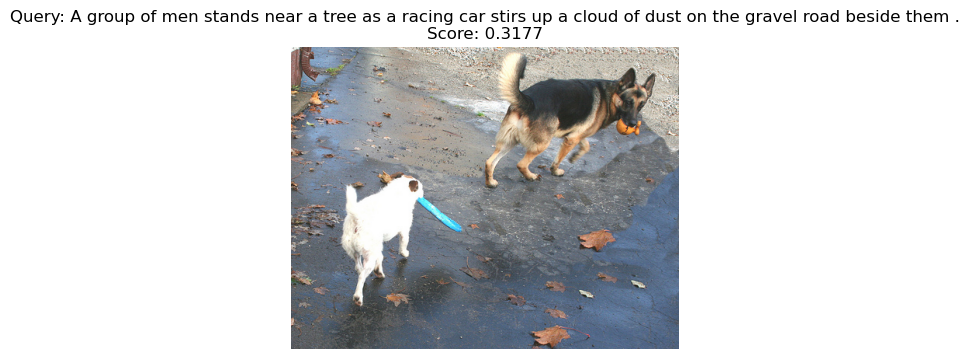

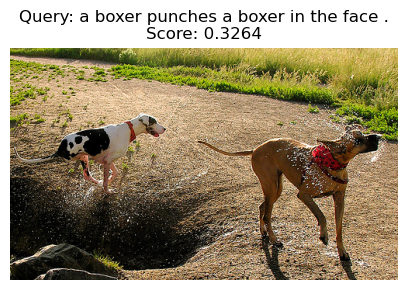

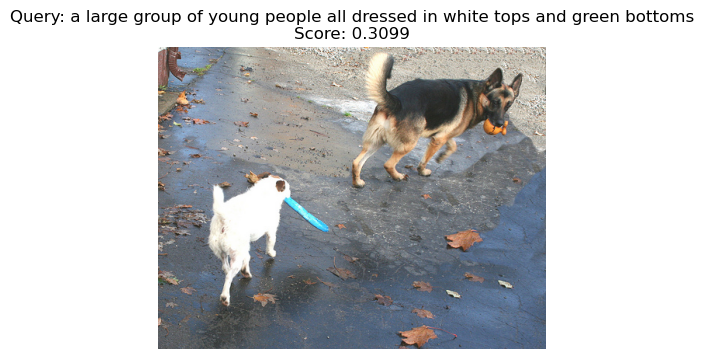

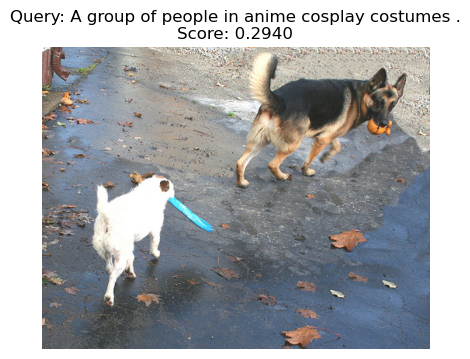

This image is unavailable in your country in compliance with local laws.
This image is unavailable in your country in compliance with local laws.
This image is unavailable in your country in compliance with local laws.
This image is unavailable in your country in compliance with local laws.


In [49]:
# Получаем 10 случайных запросов из файла test_queries.csv
random_request = df_test['query_text'].sample(10)

# Цикл для вызова функции для каждого запроса
for text in random_request:
    predict_image_for_text(text, model, model_net, preprocess, img_vectors_test, tokenizer, MAX_LEN)


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Функции написаны и со своей задачей справляются. Принимают на вход текст и находят изображение. Отрабатывают контроль "запрещенного контента".

Да, ты прав, к сожалению работают они не очень. Причин несколько
    
 - на этапе тестирования ты допускаешь ошибку в соединении векторов
 - предполагаю что модель просто не сумела хорошо обучиться (мало эпох, не использовали dropout)
    
----------------
    
Как правило хороший результат в этом проекте удается достичь при выполнении следующих условий
    
 - использование экспертных оценок   
 - векторизация изображений через pytorch, как есть в теории к спринту  (но с отрезанием только одного слоя)
 - эмбеддинги через bert
 - упорное обучение нейронки (иногда тысячи эпох, в любом случае пока лосс снижается) с тщательным подбором гиперпараметров.   
    
</div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Идеи и альтернативные подходы</b>
  Если хочешь получить хорошо работающее решение без обучения, то можешь провести эксперимент с нейронной сетью CLIP от OPEN AI (это не обязательно, только если хочешь добиться хороших результатов в этом проекте).

  Про эту нейронку много где написано, но можешь посмотреть например вот здесь  https://habr.com/ru/post/539312/.

  А для написания  реализации наиболее удобной лично для меня оказалась библиотека sbert. https://www.sbert.net/examples/applications/image-search/README.html  
    
    
<hr>    
    
Также неплохо работает следующий подход без предобученных моделей (к тому же легко реализуемый).
    
    
Вместо того, чтобы подавать на вход модели изображение + текст и получать меру соответствия, поступаем по другому. 
    
На вход модели подаем вектор описания, а на выходе учимся предсказывать вектор изображения. 
    
По поводу метрик тут ситуация следующая. Точно работает следующий подход
    
  - берем метрику mse, но тогда нужно чтобы модель её уменьшала. А значит в обучении используем только пары заведомо сответствующие друг другу

Можно попробовать использовать косинусное расстояние, она позволяет использовать все данные (если есть соответствие то выдает 1, если нет то 0). 
    
Также можно попробовать усложнить модель, например и изображения и тексты отправлять в пространство размерностью 256 и уже в этом пространстве учиться их "сближать".
    
По поводу методов векторизации: я бы использовать resnet18 для изображений (размерность эмбеддинга избражения 512) и БЕРТ для текстов (768). 
    
   
</div>

### Вывод

Во время выполнения работы нами были проведенены следующие работы:
- Векторизация изображений и текстов с использованием предобученных моделей.
- Создана функция, которая принимает текстовый запрос, векторизует его и находит наиболее подходящее изображение на основе вычисленной метрики.
- Для запросов, содержащих запрещённые законодательством слова, вместо изображений выводится дисклеймер.
  
- Модель успешно выполняет задачи по сопоставлению текстовых запросов и изображений.
- Текстовые запросы возвращают картинку, правда иногда не очень удачную.
- Запросы, содержащие запрещённые слова, корректно обрабатываются с выводом соответствующего дисклеймера.

В дальнейшем работа может быть улучшена и доработана, путем рассмотрения возможности тонкой настройки модели или применения других архитектур для более точного сопоставления.

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Заключительный комментарий</b>

Подведем итоги. Я вижу, что в целом с проектом ты справляешься.
    
Проведено исследование и предобработка данных. Выполнена векторизация изображений и текстовых описаний. Обучены модели для предсказания степени соответствия, а также написана функция для инференса и с её помощью проведено тестирование.
 
    
Там всего два красных комментария, думаю что с ними ты легко справишься.
    
Желтые комментарии на твое усмотрение. Но учитывая что наш подход "не взлетел" и нужно хоть что-то показать заказчику, попробуй показать возможный инференс с помщью CLIP. С библиотекой sentence-transformers это делается буквально в 10 строк.    
Жду твою работу на повторное ревью.
</div>